# UPC Lookup

Look up Meijer UPCs and return data.

In [6]:
import sys, os
import pandas as pd
sys.path.append(os.path.abspath("meijer"))

In [2]:
%load_ext autoreload
%autoreload 2

# Create ```Meijer``` instance.

In [7]:
from meijer import Meijer
# m = Meijer("<mperks-email>|<mperks-password>") # Password, not PIN.
# If no meijer_api_key is specified the class looks at the ```MEIJER_API_KEY``` environmental variable. 
m = Meijer()
self = m

In [10]:
m.get_upc?

# Call ```.get_upc()```

Defaults:

- upc='4125010200' [Meijer Vitamin D milk]
- storeID='226' [Rockford Meijer Store, chosen at random]


In [11]:
m.get_upc()

{'meta': {'totalResults': 1,
  'startingIndex': 0,
  'resultsReturned': 1,
  'sort': 'score desc,upc asc',
  'facets': [{'field': 'hw_claims',
    'displayName': 'Health and Wellness',
    'type': 'value',
    'values': []},
   {'field': 'ways_to_save',
    'displayName': 'Ways to Save',
    'type': 'value',
    'values': []}],
  'categories': [{'field': 'TierId',
    'displayName': 'Category',
    'values': [{'value': 'T2-10308', 'display': 'Dairy', 'count': 1},
     {'value': 'T2-10428', 'display': 'Mixed Fruit Tart', 'count': 1},
     {'value': 'T2-10658', 'display': 'Breakfast', 'count': 1},
     {'value': 'T2-10666', 'display': 'Rocky Road Brownies', 'count': 1},
     {'value': 'T2-10697', 'display': 'Holiday Baking', 'count': 1},
     {'value': 'T2-9974', 'display': 'Dairy', 'count': 1},
     {'value': 'T2-9979', 'display': 'Cereal & Breakfast', 'count': 1}]}]},
 'upcs': [{'id': '226_UPCA_4125010200',
   'score': 99.37301,
   'storeId': 226,
   'upc': '4125010200',
   'upc_type':

# List all Stores

In [12]:
stores = m.stores()

# Find All Vitamin D Milk Prices

In [15]:
data = list()
for store in stores:
    upc_data = m.get_upc(storeID=store["unitid"])
    if len(upc_data["upcs"])>0:
        try:
            tmp = {
                "storeid": store["unitid"],
                "latitude": store["latitude"],
                "longitude": store["longitude"],
                "MeijerVitaminD": upc_data["upcs"][0]["priceValue"],
            } 
            data.append(tmp)
        except KeyError:
            pass

In [18]:
len(stores)

253

In [19]:
len(data)

245

# Convert Pricing Data to pandas DataFrame

In [20]:
df = pd.DataFrame(data)

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

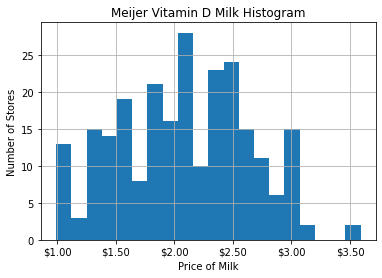

In [24]:
ax = df.MeijerVitaminD.hist(bins=20)
plt.title("Meijer Vitamin D Milk Histogram")
plt.xlabel("Price of Milk")
plt.ylabel("Number of Stores")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.2f}"))

## pl

In [ ]:
stores = m.stores()

In [ ]:
data = list()
for store in stores:
    upc_data = get_upc(self,storeID=store["unitid"])
    if len(upc_data["upcs"])>0:
        tmp = {
            "storeid": store["unitid"],
            "latitude": store["latitude"],
            "longitude": store["longitude"],
            "MeijerVitaminD": upc_data["upcs"][0]["priceValue"],
        }
        if store["FuelPrices"] is not None:
            for fuel_price in store["FuelPrices"]:
                fuel_type = fuel_price["FuelType"].split("-")[0]
                fuel_price = fuel_price["FuelPrice"]
                tmp[fuel_type]=fuel_price
        data.append(tmp)
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
df.plot.scatter(x="UNL", y="MID")

In [ ]:
df.plot.scatter(x="UNL", y="MeijerVitaminD")